# Titanik Gemisinde Hayatta Kalanları Tahmin Eden Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 df1=pd.read_csv("ttrain.csv")

In [3]:
df2=pd.read_csv("ttest.csv")

# EDA - Exploratory Data Analysis

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C


In [6]:
df1.shape, df2.shape

((891, 12), (418, 11))

In [7]:
df=df1.append(df2)

C:\Users\cemal\AppData\Local\Temp\ipykernel_10936\2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
df["Fare"].mean(),df["Fare"].min(),df["Fare"].max(),df["Fare"].std()

(33.2954792813456, 0.0, 512.3292, 51.75866823917414)

In [11]:
# bos verileri doldurur

In [12]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean()) 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

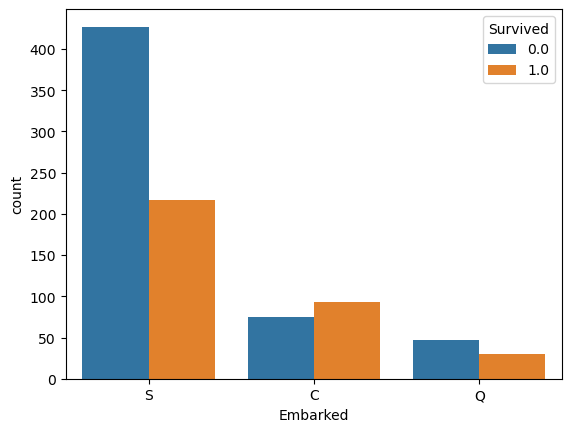

In [13]:
sns.countplot(x=df["Embarked"],hue=df["Survived"])

In [14]:
df["Embarked"].value_counts() # hangi limandan kaç kişi bindi

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
df["Embarked"].value_counts(normalize=True) # limandan binenlerin yüzdesi

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [16]:
df["Embarked"]=df["Embarked"].fillna('S')

In [17]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [18]:
del df["Cabin"]

In [19]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [20]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=False)

In [21]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [22]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [23]:
df["Title"]=df["Title"].replace(['Ms','Mlle'],'Miss')
df["Title"]=df["Title"].replace(['Mme','Countess','Lady',"Dona"],'Mrs')
df["Title"]=df["Title"].replace(['Rev','Jonkheer','Don',"Sir",'Major',"Dr",'Capt','Col'],'Mr')

In [24]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [25]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [26]:
df.groupby('Sex')["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [27]:
df.groupby('Title')["Age"].median()

Title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [28]:
df["Age"]=df["Age"].fillna(df.groupby('Title')["Age"].transform('median'))

In [29]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [30]:
df.drop(["PassengerId",'Ticket','Name'],axis=1,inplace=True)

In [31]:
df['Family']=df['SibSp']+df['Parch']+1

In [32]:
data=pd.get_dummies(df,drop_first=True)

In [33]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [34]:
data.to_csv('titanichazirveri_csv')

In [35]:
train=data[:891]
test=data[891:]

In [36]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [37]:
test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,1,0,0,1


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
d=DecisionTreeClassifier()

In [40]:
model=d.fit(x,y)

In [41]:
tahmin=model.predict(test.drop('Survived',axis=1))

In [42]:
sonuc=pd.DataFrame()

In [43]:
sonuc["PassengerId"]=df2['PassengerId']
sonuc['Survived']=tahmin

In [44]:
sonuc

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,1.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [45]:
sonuc['Survived']=sonuc['Survived'].astype('int32')

In [46]:
sonuc.to_csv('titanictahmin.csv',index=False,)